## Object detection using web camera
**Name:** k.pujitha

**Reg.No:** 212223240074

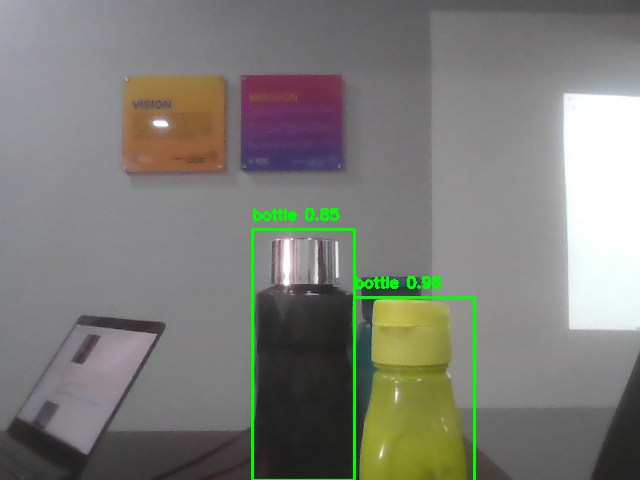

⏰ 3 minutes completed.
Showing the last captured frame:


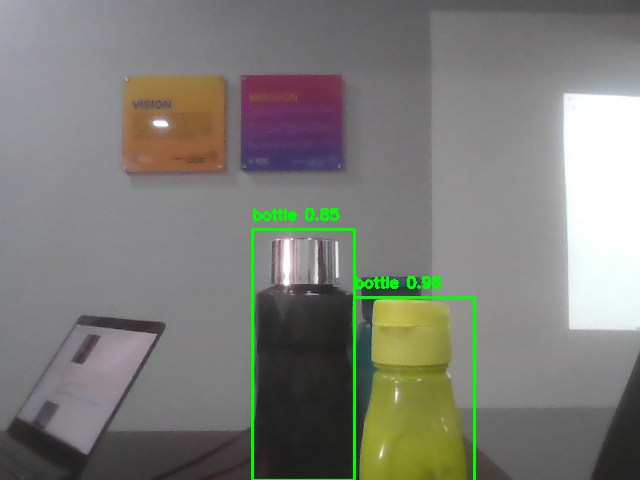

In [1]:
import cv2
import numpy as np
import time
from IPython.display import display, clear_output
from PIL import Image
import io

# Load YOLOv4 network
net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")

# Load the COCO class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Set up video capture (0 = default webcam)
cap = cv2.VideoCapture(0)

# Set the duration (in seconds)
duration = 60  # 3 minutes
start_time = time.time()

frame = None  # keep last frame
print("Starting YOLOv4 webcam stream for 3 minutes...")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame.")
        break

    height, width, _ = frame.shape

    # Prepare the image for YOLOv4
    blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Forward pass
    outputs = net.forward(output_layers)

    # Initialize detection lists
    boxes, confidences, class_ids = [], [], []

    # Parse detections
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw boxes
    if len(indexes) > 0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = confidences[i]
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, f"{label} {confidence:.2f}", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Convert to RGB for display
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(rgb_frame)

    # Display inline
    clear_output(wait=True)
    display(img)

    # Stop after 3 minutes
    if time.time() - start_time > duration:
        print("⏰ 3 minutes completed.")
        brea

# Release camera
cap.release()

# Show the last captured frame as still image
print("Showing the last captured frame:")
display(img)
